# Data Analysis and Prediction of Bank Marketing 

The data I used in this study is obtained from a publication entitled "A data-driven approach to predict the success of bank telemarketing".  
Moro, Sérgio, Paulo Cortez, and Paulo Rita. "A data-driven approach to predict the success of bank telemarketing." Decision Support Systems 62 (2014): 22-31.  
Available at: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Import some libraries to work with

In [1]:
# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Reading and cleaning data 

In [3]:
df_bank = pd.read_csv('bank/bank-full.csv', names=['column'], header=None)

In [4]:
df_bank.head()

,column
0,"age;""job"";""marital"";""education"";""default"";""bal..."
1,"58;""management"";""married"";""tertiary"";""no"";2143..."
2,"44;""technician"";""single"";""secondary"";""no"";29;""..."
3,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
4,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."


### Arranging data to columns, split by ";"

In [5]:
df_bank[['age','job','marital','education','default',"balance","housing","loan","contact","day","month","duration","campaign","pdays",
        "previous","poutcome","y"]] = df_bank.column.str.split(";",expand=True)
df_bank.head()

,column,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,"age;""job"";""marital"";""education"";""default"";""bal...",age,"""job""","""marital""","""education""","""default""","""balance""","""housing""","""loan""","""contact""","""day""","""month""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""y"""
1,"58;""management"";""married"";""tertiary"";""no"";2143...",58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
2,"44;""technician"";""single"";""secondary"";""no"";29;""...",44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
3,"33;""entrepreneur"";""married"";""secondary"";""no"";2...",33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
4,"47;""blue-collar"";""married"";""unknown"";""no"";1506...",47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""


### Removing double quotation marks " 

In [6]:
df_bank = df_bank.apply(lambda s:s.str.replace('"', ""))
df_bank.head()

,column,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age;job;marital;education;default;balance;hous...,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,58;management;married;tertiary;no;2143;yes;no;...,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44;technician;single;secondary;no;29;yes;no;un...,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33;entrepreneur;married;secondary;no;2;yes;yes...,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47;blue-collar;married;unknown;no;1506;yes;no;...,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no


In [8]:
df_bank.dtypes

column       object
age          object
job          object
marital      object
education    object
default      object
balance      object
housing      object
loan         object
contact      object
day          object
month        object
duration     object
campaign     object
pdays        object
previous     object
poutcome     object
y            object
dtype: object

### Removing the first row of our data frame since it contain only header name and change the label column 'y' from 'yes' and 'no' to 1 and 0, respectively.

In [9]:
df_bank.drop(columns=['column'], inplace=True)
df_bank.drop([0], inplace=True)
df_bank.loc[df_bank['y'] == 'yes', ['y']] = 1
df_bank.loc[df_bank['y'] == 'no', ['y']] = 0
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### Converting some data types of some columns

In [10]:
cols = ['age','balance','day','duration', 'campaign','pdays','previous','y']
df_bank[cols] = df_bank[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [11]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

## Data Exploration Analysis (DEA)

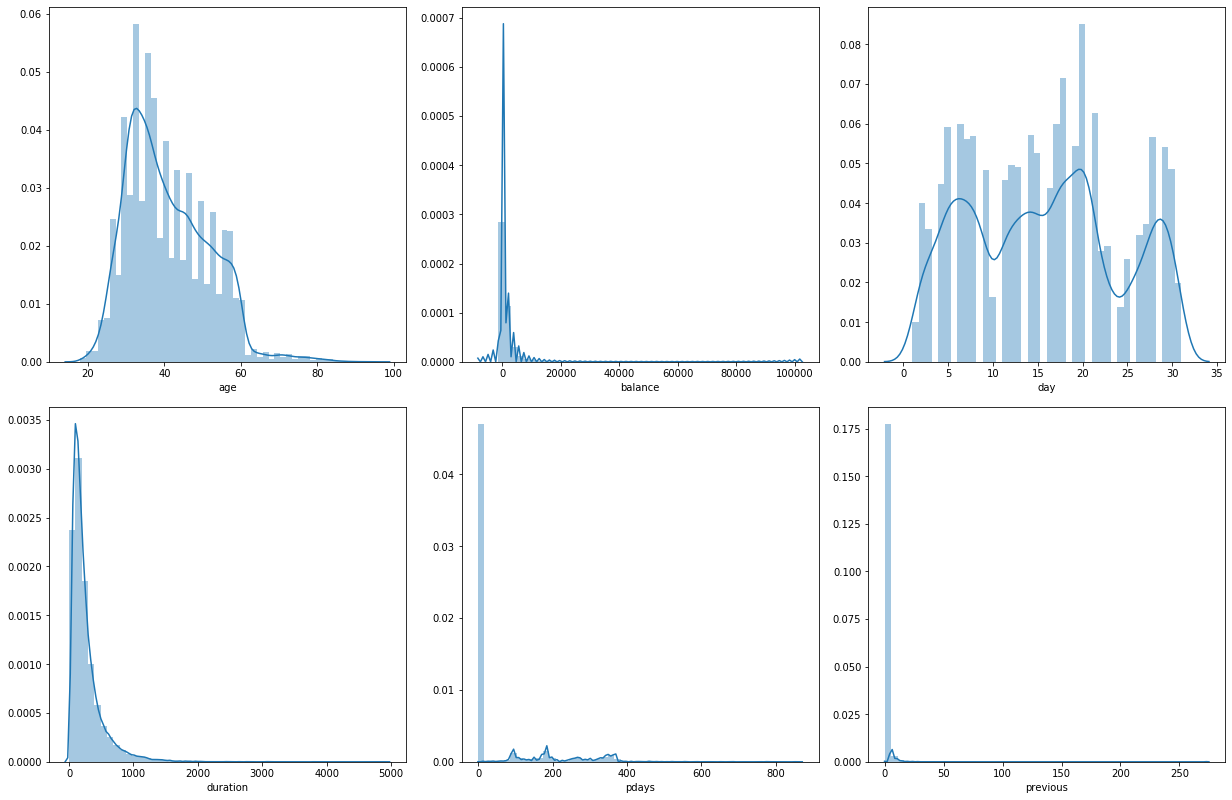

In [12]:
f, axes = plt.subplots(2,3, figsize=(17, 11), sharex=False, constrained_layout=True)

sns.distplot(df_bank['age'], ax = axes[0,0])
sns.distplot(df_bank['balance'], ax = axes[0,1])
sns.distplot(df_bank['day'], ax = axes[0,2])
sns.distplot(df_bank['duration'], ax = axes[1,0])
sns.distplot(df_bank['pdays'], ax = axes[1,1])
sns.distplot(df_bank['previous'], ax = axes[1,2])

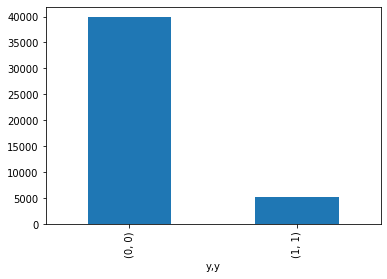

In [13]:
df_bank.groupby('y').y.value_counts().plot.bar()

Text(0, 0.5, 'Marital Status')

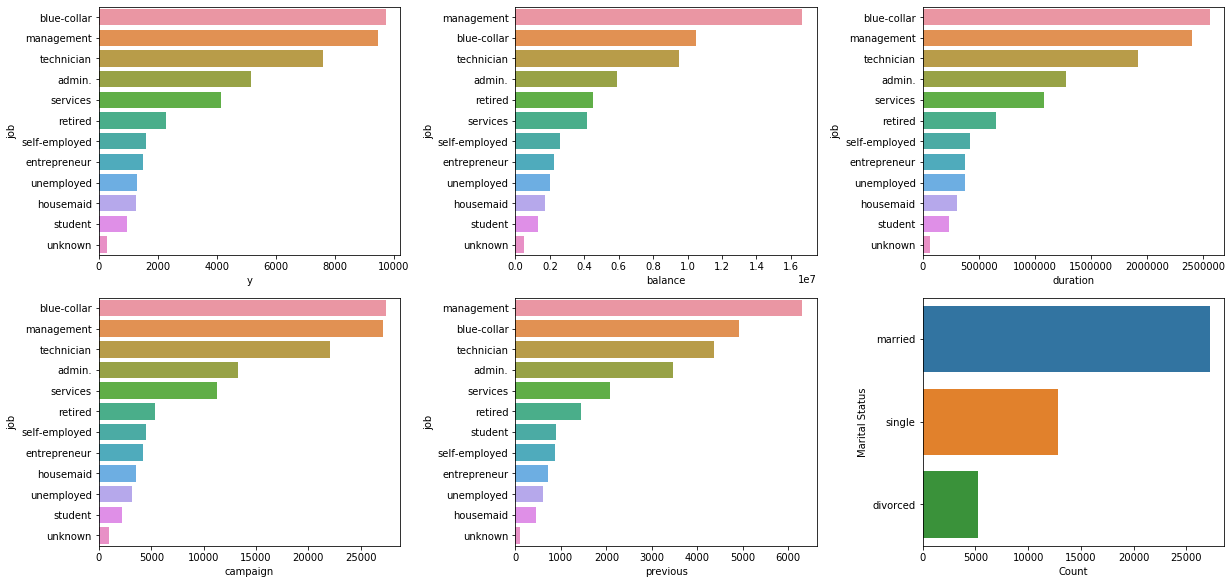

In [14]:
f, axes = plt.subplots(2,3, figsize=(17, 8), sharex=False, constrained_layout=True)

#sns.distplot(df_bank['age'], ax = axes[0,0])
grouped = df_bank.groupby('job').count().reset_index()
grouped.sort_values('age', ascending=False, inplace=True)
ax = sns.barplot(x="y", y="job", data=grouped, ax = axes[0,0])
plt.xlabel("Count")
plt.ylabel("Job title")
#plt.title("Number of jobs")

grouped = df_bank.groupby('job').sum().reset_index()
grouped.sort_values('balance', ascending=False, inplace=True)
ax = sns.barplot(x="balance", y="job", data=grouped, ax = axes[0,1]) 

grouped = df_bank.groupby('job').sum().reset_index()
grouped.sort_values('duration', ascending=False, inplace=True)
ax = sns.barplot(x="duration", y="job", data=grouped, ax = axes[0,2])

grouped = df_bank.groupby('job').sum().reset_index()
grouped.sort_values('campaign', ascending=False, inplace=True)
ax = sns.barplot(x="campaign", y="job", data=grouped, ax = axes[1,0])

grouped = df_bank.groupby('job').sum().reset_index()
grouped.sort_values('previous', ascending=False, inplace=True)
ax = sns.barplot(x="previous", y="job", data=grouped, ax = axes[1,1])

grouped = df_bank.groupby('marital').count().reset_index()
grouped.sort_values('age', ascending=False, inplace=True)

ax = sns.barplot(y="marital", x="age", data=grouped, ax = axes[1,2])
plt.xlabel("Count")
plt.ylabel("Marital Status")

### Trying to plot using pie chart may give us different understanding of the proportion

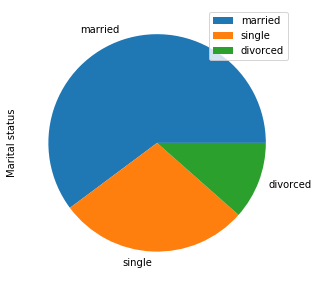

In [15]:
grouped = df_bank.groupby('marital').count().reset_index()
new_index= grouped['marital'].values
#grouped.reindex(new_index)
grouped.sort_values('age', ascending=False, inplace=True)
new_grouped = grouped.set_index('marital')
plot = new_grouped.plot.pie(y='age', label = 'Marital status', figsize=(5, 5))

## Correlation between some variables

In [16]:
df = df_bank.copy()

In [17]:
columns = ['age','balance','day','duration', 'campaign','pdays','previous', 'y']

In [18]:
#removed_col = lambda columns : df_bank.columns not in columns
removed_columns = []
for col in df_bank.columns:
    if col not in columns:
        removed_columns.append(col)
removed_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [19]:
df.drop(columns=removed_columns, inplace=True)

In [20]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,y
1,58,2143,5,261,1,-1,0,0
2,44,29,5,151,1,-1,0,0
3,33,2,5,76,1,-1,0,0
4,47,1506,5,92,1,-1,0,0
5,33,1,5,198,1,-1,0,0


In [21]:
df.ix[df.y == 0, ['y']] = 'No'
df.ix[df.y == 1, ['y']] = 'Yes'

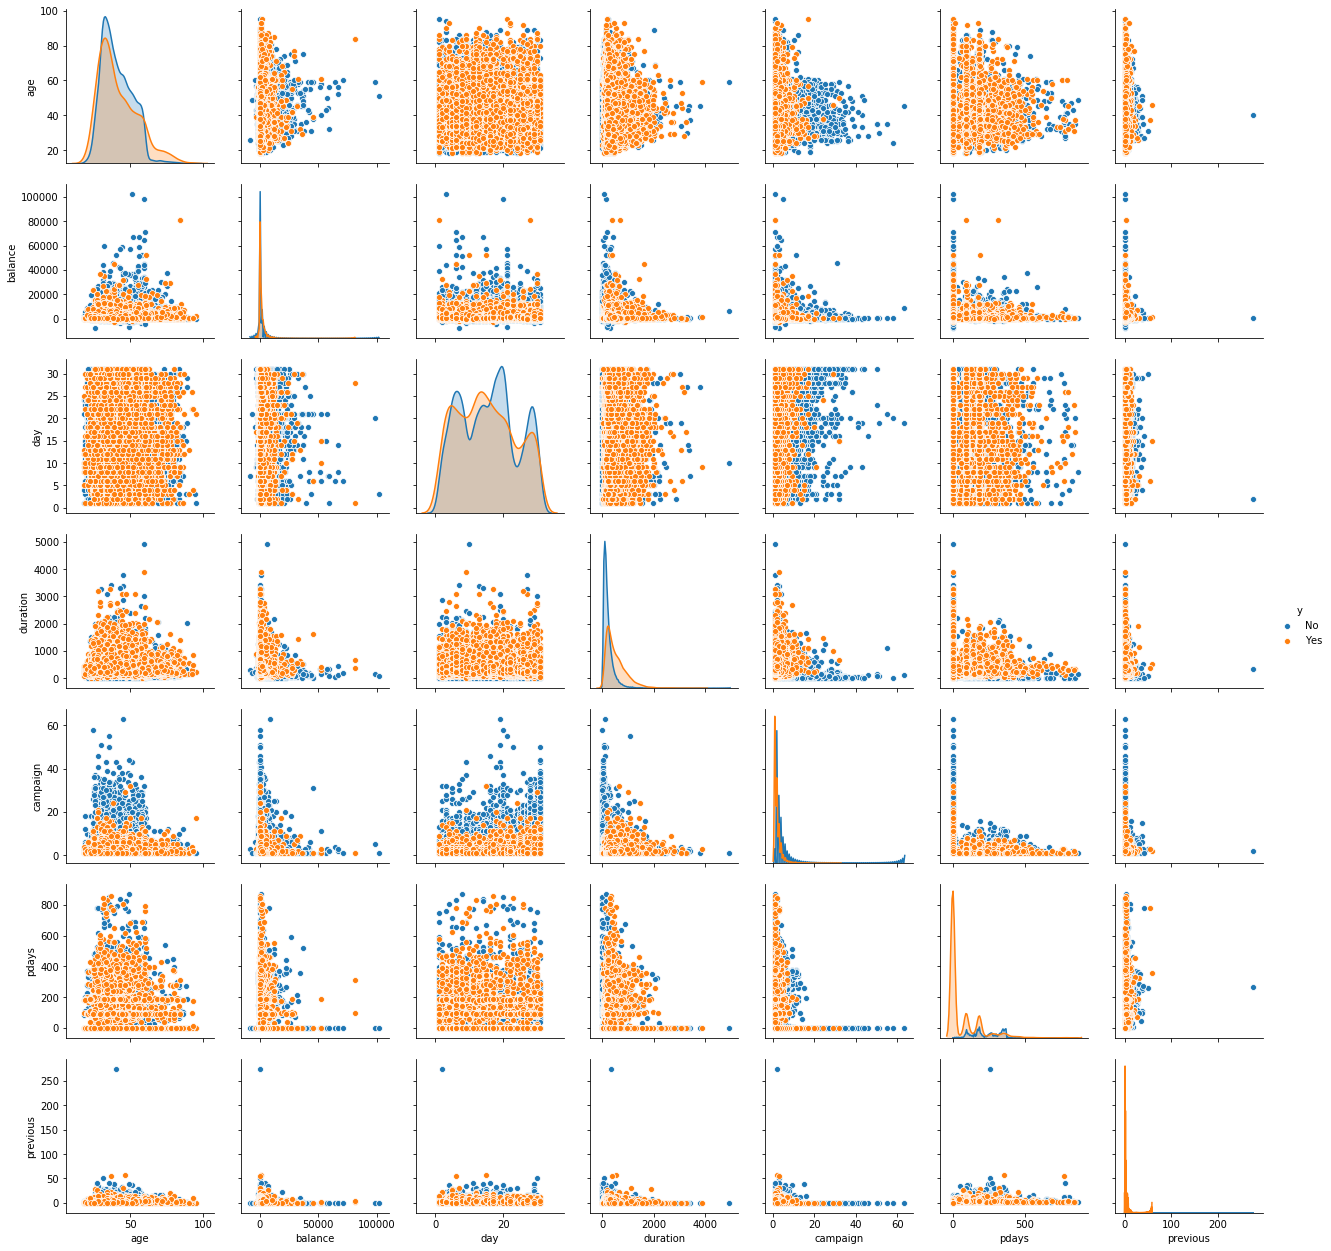

In [22]:
sns.pairplot(df, hue="y", diag_kind='kde')

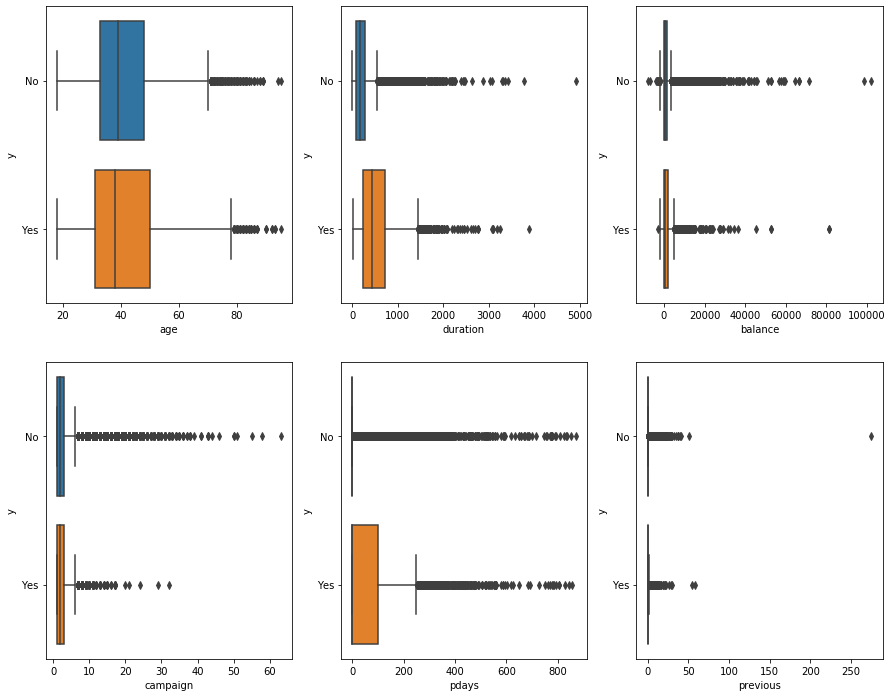

In [23]:
#### plt.figure(figsize=(12,8))
#plt.subplot(121)
#sns.swarmplot('y', 'age', data = df)
#plt.subplot(122)
#sns.violinplot('y', 'age', data = df)
plt.figure(figsize=(15,12))
plt.subplot(231)
ax = sns.boxplot(x="age", y="y", data=df)
plt.subplot(232)
ax = sns.boxplot(x="duration", y="y", data=df)
plt.subplot(233)
ax = sns.boxplot(x="balance", y="y", data=df)
plt.subplot(234)
ax = sns.boxplot(x="campaign", y="y", data=df)
plt.subplot(235)
ax = sns.boxplot(x="pdays", y="y", data=df)
plt.subplot(236)
ax = sns.boxplot(x="previous", y="y", data=df)

## After we explore the data, now it is time to engineer our features such that the machine learning model can learn from them. 

In [24]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(df_bank)
# Display the first 5 rows of the last 12 columns
#features.iloc[:,5:].head(5)
features.shape

(45211, 52)

### Plot scatter plots

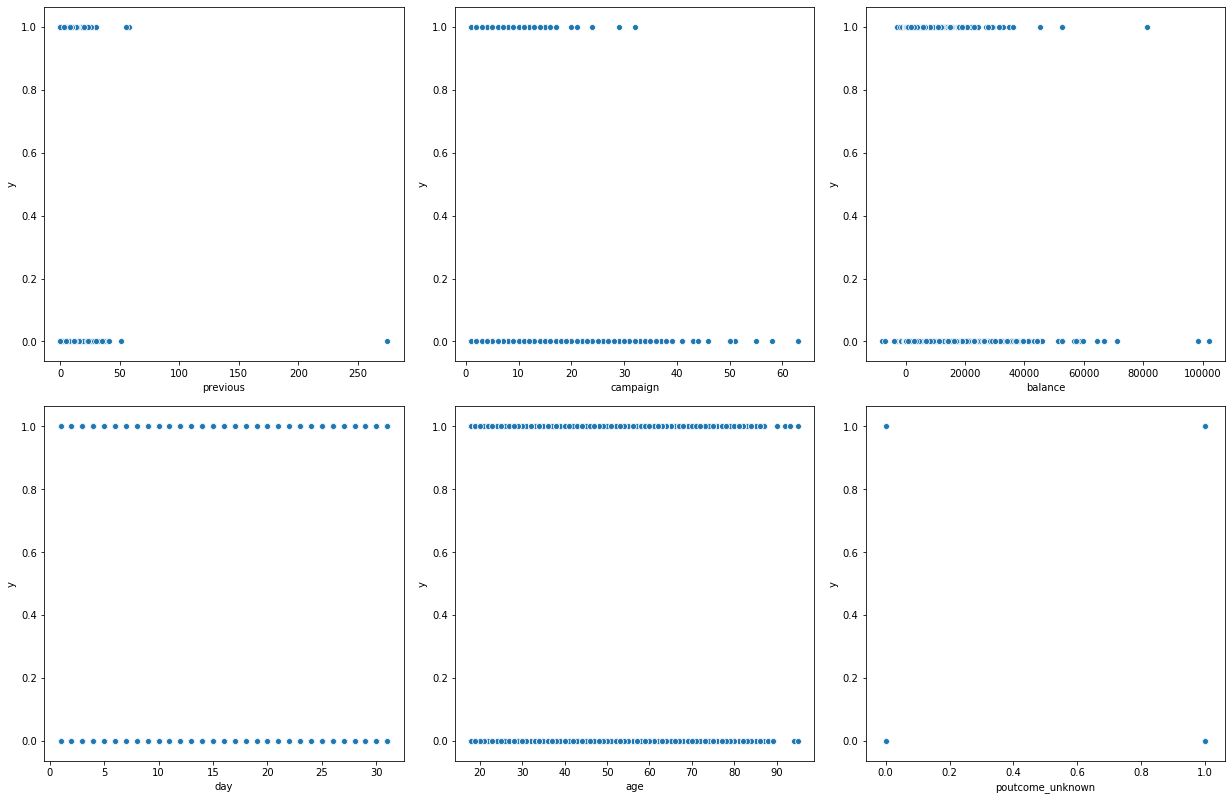

In [25]:
f, axes = plt.subplots(2,3, figsize=(17, 11), sharex=False, constrained_layout=True)

sns.scatterplot(x="previous", y="y", data=features, ax = axes[0,0])
sns.scatterplot(x="campaign", y="y", data=features, ax = axes[0,1])
sns.scatterplot(x="balance", y="y", data=features, ax = axes[0,2])
sns.scatterplot(x="day", y="y", data=features, ax = axes[1,0])
sns.scatterplot(x="age", y="y", data=features, ax = axes[1,1])
sns.scatterplot(x="poutcome_unknown", y="y", data=features, ax = axes[1,2])

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [27]:
y = features['y']
X = features.drop(columns='y')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Plot correlation matrix of the variables¶

In [29]:
co_mat = X_train.corr()

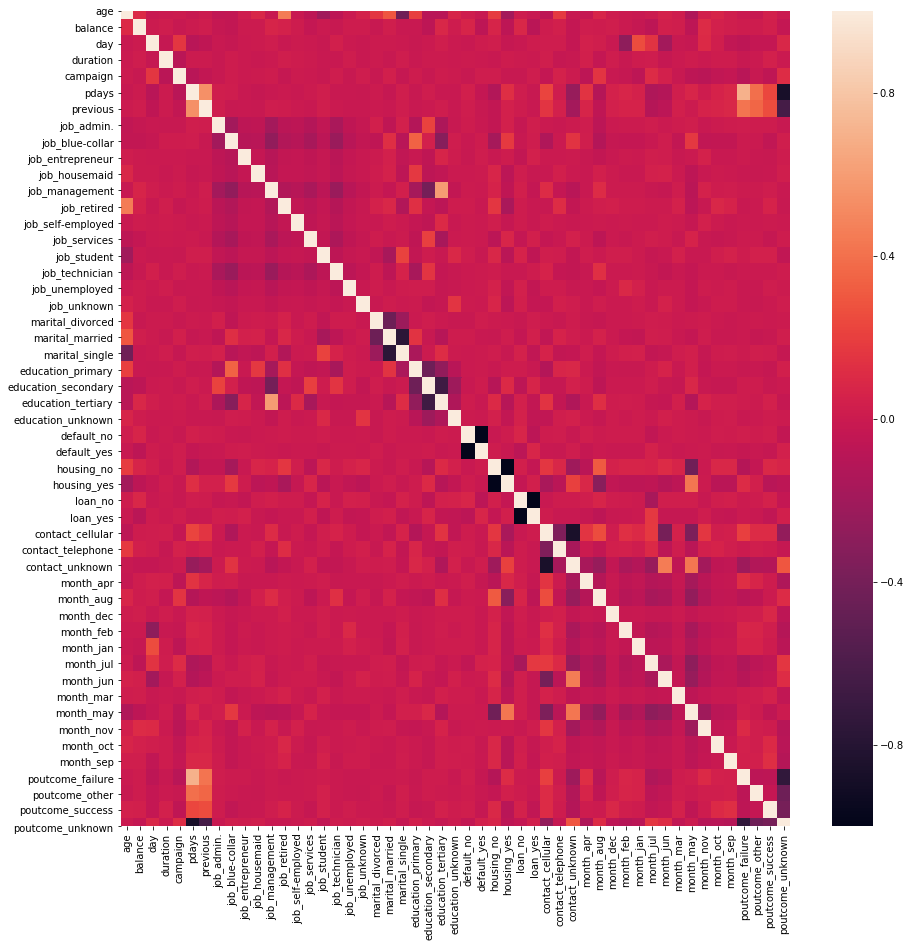

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(co_mat)

## Modeling and predicting whether customers subcribe to the service or not by using three classifiers, e.g., CatBoost, Random Forest, and Deep learning. 

In [31]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import precision_recall_fscore_support, f1_score

In [34]:
eval_dataset = Pool(X_test, y_test)

model_catBoost = CatBoostClassifier(iterations=1000, learning_rate=0.1, eval_metric='AUC')

In [35]:
model_catBoost.fit(X_train, y_train, 
                            eval_set=eval_dataset, 
                            verbose=1000,
                            early_stopping_rounds=1000,
                            plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8376576	best: 0.8376576 (0)	total: 59ms	remaining: 58.9s
999:	test: 0.9337591	best: 0.9349601 (286)	total: 28.9s	remaining: 0us

bestTest = 0.9349601026
bestIteration = 286

Shrink model to first 287 iterations.


In [36]:
model_catBoost.score(X_test, y_test) # Score is the F-1 score

0.9107597036381732

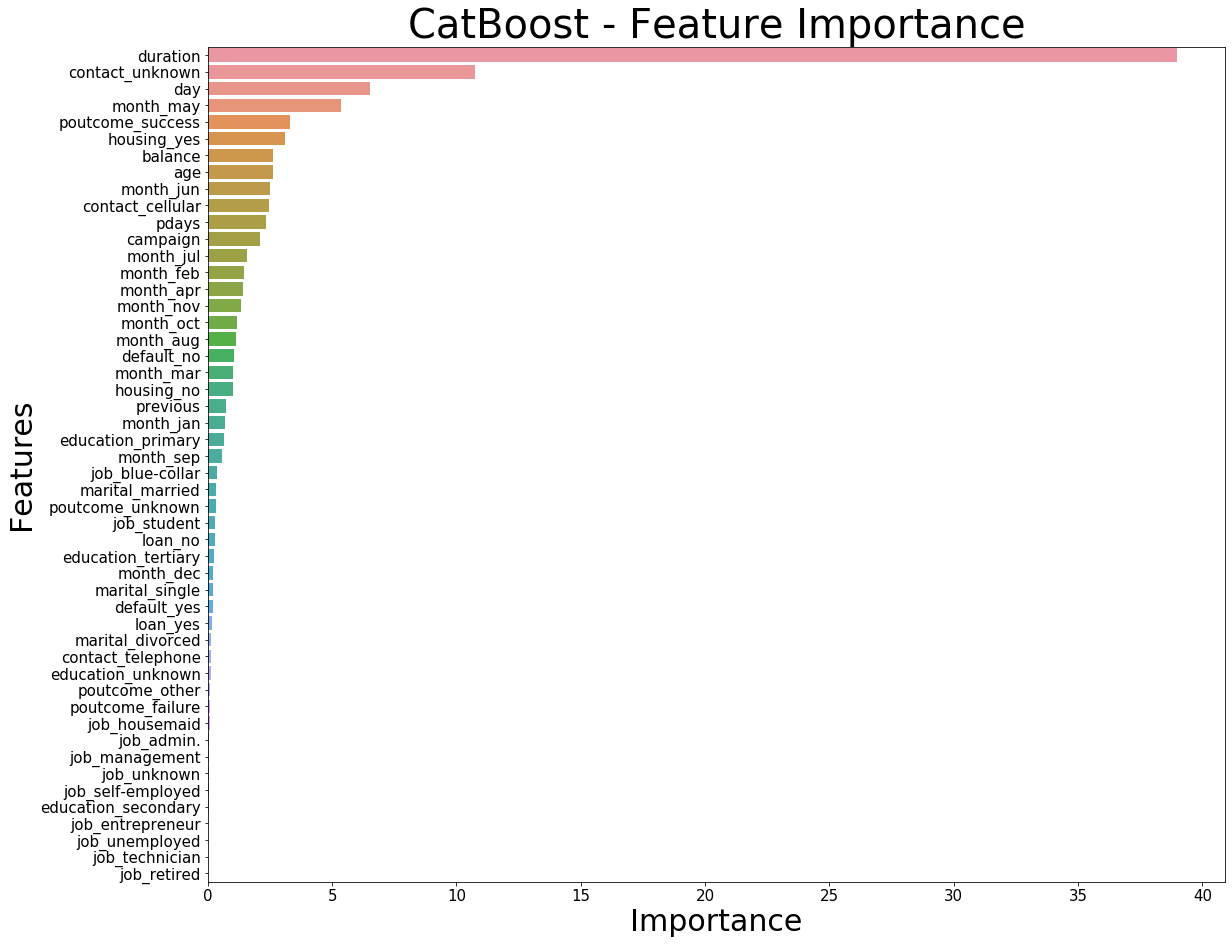

In [37]:
f, axes = plt.subplots(1,1, figsize=(17, 13), sharex=False, constrained_layout=True)
fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': X_train.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[False, False]).iloc[0:50]
bar = sns.barplot(y='col', x='imp', data=fea_imp)
bar.axes.set_title('CatBoost - Feature Importance',fontsize=40)
bar.set_ylabel('Features',fontsize=30)
bar.set_xlabel('Importance',fontsize=30);
bar.tick_params(labelsize=15)

## Random Forest

In [39]:
randForest_clf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
randForest_clf = randForest_clf.fit(X_train, y_train)
end = time.time()
fit_time = (end - start)

y_pred = randForest_clf.predict(X_test)

randForest_clf.fit(X_train, y_train)
randForest_clf.score(X_test, y_test) # Score is the F-1 score

0.9060046444763906

## Deep Neural Network (DNN)

In [40]:
import tensorflow as tf
from tensorflow import keras 

In [41]:
model_dnn = keras.models.Sequential()
model_dnn.add(keras.layers.Flatten())
model_dnn.add(keras.layers.Dense(100, kernel_initializer="he_normal", activation = "elu", 
          kernel_regularizer = keras.regularizers.l2(0.01)))
model_dnn.add(keras.layers.Dense(100, kernel_initializer="he_normal",  activation = "elu",
         kernel_regularizer = keras.regularizers.l2(0.01)))
model_dnn.add(keras.layers.Dense(100, kernel_initializer="he_normal",  activation = "elu",
          kernel_regularizer = keras.regularizers.l2(0.01)))
model_dnn.add(keras.layers.Dense(1, activation = "sigmoid"))

In [42]:
model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
X_tr = np.array(X_train)
y_tr = np.array(y_train)
X_te = np.array(X_test)
y_te = np.array(y_test)

y_tr = np.asarray(y_tr).astype('float32').reshape((-1,1))
y_te = np.asarray(y_te).astype('float32').reshape((-1,1))

history = model_dnn.fit(X_tr, y_tr, epochs = 30, validation_data = (X_te, y_te))

Train on 36168 samples, validate on 9043 samples
Epoch 1/30
36168/36168 [==============================] - 2s 69us/sample - loss: 9.9116 - accuracy: 0.8270 - val_loss: 6.9015 - val_accuracy: 0.8653
Epoch 2/30
36168/36168 [==============================] - 2s 46us/sample - loss: 3.3521 - accuracy: 0.8545 - val_loss: 2.5902 - val_accuracy: 0.8108
Epoch 3/30
36168/36168 [==============================] - 2s 47us/sample - loss: 2.1599 - accuracy: 0.8752 - val_loss: 1.8488 - val_accuracy: 0.8821
Epoch 4/30
36168/36168 [==============================] - 2s 47us/sample - loss: 1.6357 - accuracy: 0.8836 - val_loss: 1.4739 - val_accuracy: 0.8850
Epoch 5/30
36168/36168 [==============================] - 2s 48us/sample - loss: 1.3325 - accuracy: 0.8827 - val_loss: 1.1995 - val_accuracy: 0.8862
Epoch 6/30
36168/36168 [==============================] - 2s 48us/sample - loss: 1.0702 - accuracy: 0.8835 - val_loss: 0.9413 - val_accuracy: 0.8857
Epoch 7/30
36168/36168 [==============================] -

In [45]:
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  5200      
_________________________________________________________________
dense_1 (Dense)              multiple                  10100     
_________________________________________________________________
dense_2 (Dense)              multiple                  10100     
_________________________________________________________________
dense_3 (Dense)              multiple                  101       
Total params: 25,501
Trainable params: 25,501
Non-trainable params: 0
_________________________________________________________________


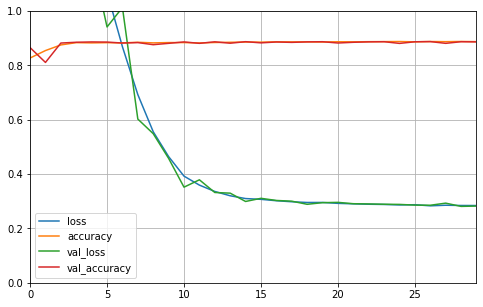

In [46]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Great! Deep learning model is not overfitted. 